# Exercise 2:

Afim de estudar o efeito dos zeros na resposta de um sistema, considere a função de transferência dada na equação

$G(s) = \Large\frac{\alpha s + 1}{2s² + 3s + 1}$

Faça o seguinte:

1. Para $\alpha = 1$, encontre e plote as respostas ao degrau unitário e ao impulso.
2. Para $\alpha = [−1, 0, 1, 2]$, plote e compare a resposta ao degrau unitário.
3. Discuta como o sistema varia sua resposta para os diferentes valores de α.

## Base Teórica

Como expicado no item anterios, uma função de transferência pode ser escrita como:

$$
F(s) = \frac{N(s)}{D(s)} = \frac{b_ms^m + b_{m-1}s^{m-1} + ... + b_1s + b_0}{a_ns^n + a_{n-1}s^{n-1} + ... + a_1s + a_0}
$$

Ao fatorarmos $N(s) \ e \ D(s)$, podemos representar a função como:

$$
F(s) = K\frac{(s-z_1)(s-z_2)...(s-z_{m-1})(s-z_m)}{(s-p_1)(s-p_2)...(s-p_{n-1})(s-p_n)}
$$

Onde:

- $\{z_i \mid 1 \leq i \leq m\}$ são as raízes ne $N(S) = 0$ e são definidas como os **zeros** do sistema
- $\{p_i \mid 1 \leq i \leq n\}$ são as raízes ne $D(S) = 0$ e são definidas como os **polos** do sistema
- $K$ é a constante de ganho.

No caso de $G(s)$, temos que o coeficiente líder do numerador $N(S) = \alpha s + 1$ será $\alpha$. Nesse caso:

$$
K = \frac{b_m}{a_n} = \frac{\alpha}{2}
$$

Logo, $\alpha$ influencia diretamente na constante de ganho da função de transferência.

## Parte 1

1. Para $\alpha = 1$, encontre e plote as respostas ao degrau unitário e ao impulso.

### Resposta ao Impulso

A partir de agora, vamos definir $Y(s) = N(s)$ como a saída e $U(s) = D(s)$ como a entrada.

Nesse caso, sabendo que para o degrau unitário temos que $U(s) = 1$, podemos definir nossa saída como:

$$
G(s) = \frac{Y(s)}{U(s)} \\
\therefore Y(s) = G(s)U(s) \\
\therefore Y(s) = G(s) = \frac{s + 1}{2s² + 3s + 1}
$$

Logo, como sabemos que $K = \frac{1}{2}$, fpodemos fatorar nosso denominador como: 

$$
Y(s) = \frac{\frac{1}{2}(s + 1)}{(s+1)(s+\frac{1}{2})} = \frac{\frac{1}{2}}{s+\frac{1}{2}}
$$

Logo, aplicando a inversa de laplace:

$$
y(t) = \frac{1}{2}e^{-\frac{1}{2}t}
$$

Em python, vamos utilizar a biblioteca `control` para encontrar e plotar a resposta do sistema. Vamos usar a função `tf()` para gerar um modelo da nossa função de transferência e usar a função `impulse_response()` para gerar a resposta da função de transferência ao impulso. Também vamos usar a biblioteca `malplotlib`para printar os gráficos gerados pelo código: 

In [10]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

num = [1, 1]
den = [2, 3, 1]

W = ct.tf(num, den)

W

TransferFunction(array([1, 1]), array([2, 3, 1]))

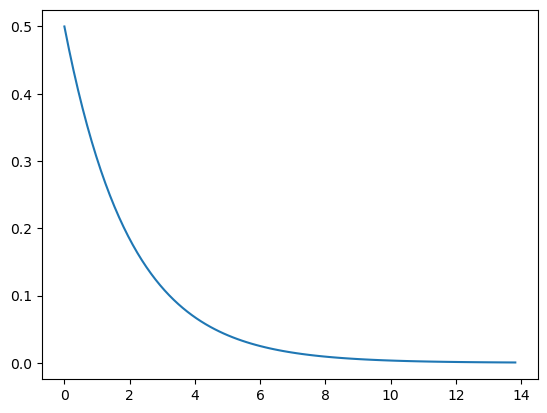

In [11]:
xi, yi = ct.impulse_response(W)

plt.plot(xi, yi)
plt.show()

### Resposta ao Degrau Unitário

No caso do degrau unitário, temos que $U(s) = \frac{1}{s}$, logo:

$$
Y(s) = \frac{\frac{1}{2}}{s(s+\frac{1}{2})} = \frac{A}{s} + \frac{B}{s + \frac{1}{2}}
$$

Usando o mesmo método do **Exercise 1**:

$$
A = (s)Y(s) \vert_{s \to 0} = \frac{\frac{1}{2}}{0 + \frac{1}{2}} = 1 \\
B = (s + \frac{1}{2})Y(s) \vert_{s \to -\frac{1}{2}} = \frac{\frac{1}{2}}{-\frac{1}{2}} = -1
$$

Logo:

$$
Y(s) = \frac{1}{s} + \frac{-1}{s + \frac{1}{2}}
$$

Logo, aplicando a inversa de Laplace:

$$
y(t) = 1(t) - e^{-\frac{1}{2}t}
$$

Onde 1(t) é a função degrau unitário. Em python:

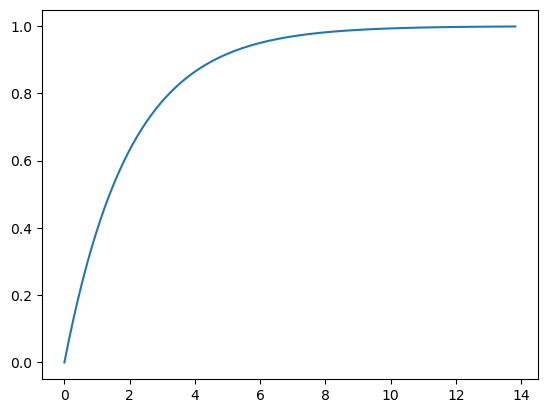

In [12]:
xs, ys = ct.step_response(W)

plt.plot(xs, ys)
plt.show()

## Parte 2

Para a segunda parte, vamos montar nossos 4 modelos, um para cada valor de $\alpha$:

In [14]:
num1 = [-1, 1]
num2 = [0, 1]
num3 = [1, 1]
num4 = [2, 1]

W1 = ct.tf(num1, den)
W2 = ct.tf(num2, den)
W3 = ct.tf(num3, den)
W4 = ct.tf(num4, den)

W1

TransferFunction(array([-1,  1]), array([2, 3, 1]))

In [15]:
W2

TransferFunction(array([1]), array([2, 3, 1]))

In [16]:
W3

TransferFunction(array([1, 1]), array([2, 3, 1]))

In [17]:
W4

TransferFunction(array([2, 1]), array([2, 3, 1]))

Agora, podemos achar a resposta ao degrau unitário de cada uma delas e printar em um mesmo gráfico:

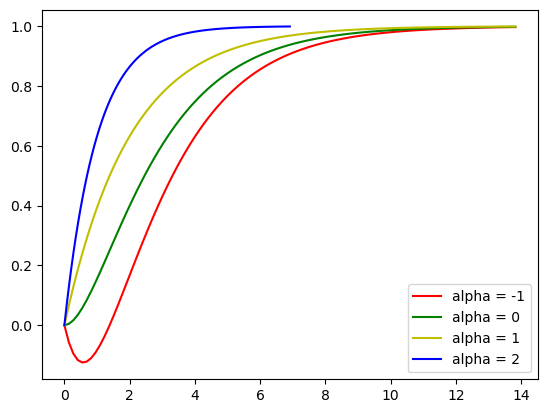

In [18]:
x1, y1 = ct.step_response(W1)
x2, y2 = ct.step_response(W2)
x3, y3 = ct.step_response(W3)
x4, y4 = ct.step_response(W4)

plt.plot(x1, y1, color='r', label='alpha = -1')
plt.plot(x2, y2, color='g', label='alpha = 0')
plt.plot(x3, y3, color='y', label='alpha = 1')
plt.plot(x4, y4, color='b', label='alpha = 2')

plt.legend()
plt.show()

## Parte 3

3. Discuta como o sistema varia sua resposta para os diferentes valores de α.

Como discutido na base teórica desse exercício, a constante $\alpha$ está diretamente ligada à constante de ganho de uma função de transferência. Logo, quanto maior o $\alpha$, maior a constante de ganho $K$ e, analisando o gráfico anterior, para o caso particular da rsposta ao degrau unitário, quanto maior a constante de ganho, mais rápido o sistema converge para 1.